# Detects a piece of image in an image

In [ ]:
!pip install numpy matplotlib opencv-python

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
game_img = cv.imread('../data/mario_game.png', cv.IMREAD_UNCHANGED)
mario_img = cv.imread('../data/mario.png', cv.IMREAD_UNCHANGED)

In [4]:
def imgShow(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [5]:
#get the best match position
result = cv.matchTemplate(game_img, mario_img, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

In [6]:
# if found
threshold = 0.65
if max_val >= threshold:
    
    needle_w = mario_img.shape[1]
    needle_h = mario_img.shape[0]
    
    top_left = max_loc
    bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)
    
    cv.rectangle(game_img, top_left, bottom_right, color=(0,255,0), thickness=2, lineType=cv.LINE_4)

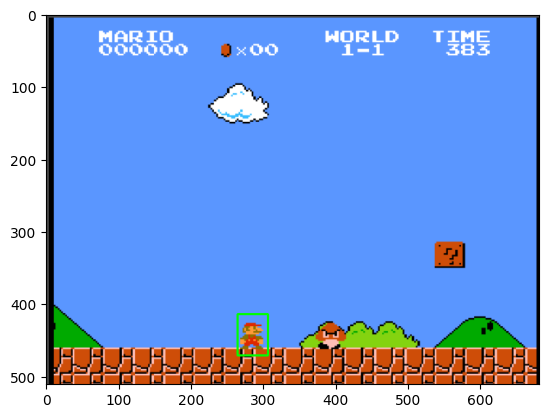

In [7]:
imgShow(game_img)